In [ ]:
import pandas as  pd
import numpy as np
import seaborn as  sb
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier # Model 1 or Base Model
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier # Model 2
from sklearn.tree import DecisionTreeClassifier # Model 3
from sklearn.model_selection import RandomizedSearchCV # Model 4
from sklearn.ensemble import AdaBoostClassifier,StackingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support,roc_auc_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,roc_curve
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.metrics import geometric_mean_score as gmean

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df=pd.read_csv("ucc.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
df.shape

(30000, 25)

In [ ]:
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [ ]:
df.iloc[:,6:12].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [ ]:
df.iloc[:,12:18].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [ ]:
df.iloc[:,18:24].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [ ]:
for i in range(2,12):
  if  i!=5:
    print(df.columns[i],"\n")
    print(df[df.columns[i]].value_counts())
    print("--------------------------------\n")

SEX 

2    18112
1    11888
Name: SEX, dtype: int64
--------------------------------

EDUCATION 

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
--------------------------------

MARRIAGE 

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
--------------------------------

PAY_0 

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64
--------------------------------

PAY_2 

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
--------------------------------

PAY_3 

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
--------------------------------

PAY_4 

 0    16455
-1     5687
-2     4348

In [ ]:
df1=df.copy()

In [ ]:
df1.rename(columns={"default.payment.next.month":"default"}, inplace=True)

df1.columns = df1.columns.str.strip().str.replace(' ', '_').str.lower()

In [ ]:
fill_mar = (df1.marriage == 0)
df1.loc[fill_mar, 'marriage'] = 2

In [ ]:
fill_edu = (df1.education == 0) | (df1.education == 5) | (df1.education == 6)
df1.loc[fill_edu, 'education'] = 4
df1.loc[fill_edu, 'education'] = 4

In [ ]:
df1.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
for i in range(2,5):
    print(df1.columns[i],"\n")
    print(df1[df1.columns[i]].value_counts())
    print("--------------------------------\n")

sex 

2    18112
1    11888
Name: sex, dtype: int64
--------------------------------

education 

2    14030
1    10585
3     4917
4      468
Name: education, dtype: int64
--------------------------------

marriage 

2    16018
1    13659
3      323
Name: marriage, dtype: int64
--------------------------------



In [ ]:
df1.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df1.isna().sum()

id           0
limit_bal    0
sex          0
education    0
marriage     0
age          0
pay_0        0
pay_2        0
pay_3        0
pay_4        0
pay_5        0
pay_6        0
bill_amt1    0
bill_amt2    0
bill_amt3    0
bill_amt4    0
bill_amt5    0
bill_amt6    0
pay_amt1     0
pay_amt2     0
pay_amt3     0
pay_amt4     0
pay_amt5     0
pay_amt6     0
default      0
dtype: int64

In [ ]:
df1.rename(columns={'pay_0': 'pay_1'},inplace=True)
df1.head()

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df2=df1.copy()

In [ ]:
X = df2.drop(['id','default'], axis=1)
y = df2['default']
X.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [ ]:
sc=StandardScaler()

In [ ]:
for i in range(len(X.columns)):
  if i not in [1,2,3,5,6,7,8,9,10]:
    X[[X.columns[i]]]=sc.fit_transform(X[[X.columns[i]]])

In [ ]:
X.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,-1.136720,2,2,1,-1.246020,2,2,-1,-1,-2,-2,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,2,2,2,-1.029047,-1,2,0,0,0,2,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,2,2,2,-0.161156,0,0,0,0,0,0,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,2,2,1,0.164303,0,0,0,0,0,0,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,1,2,1,2.334029,-1,0,-1,0,0,0,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(22500, 23) (22500,)
(7500, 23) (7500,)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def dictionaries():
  dic_acc={"Accuracy":[],"ROC-AUC":[],"GMean":[]}
  dic_basic0={"Precision":[],"Recall":[],"Fscore":[],"Support":[]}
  dic_basic1={"Precision":[],"Recall":[],"Fscore":[],"Support":[]}
  return dic_acc,dic_basic0,dic_basic1

In [ ]:
class full_activity:
  def ml_models(self):
    rf = RandomForestClassifier(random_state=0)
    knn = KNeighborsClassifier()
    ada = AdaBoostClassifier(random_state=0)
    gb = GradientBoostingClassifier(random_state=0)
    lr= LogisticRegression(random_state=0)
    all_model=[rf,knn,ada,gb,lr]
    return all_model

  def model_maker(self,X_train,X_test,y_train,y_test,model,dic_acc_basic,dic_metrics_basic0,dic_metrics_basic1):
      model1 = model
      model1.fit(X_train, y_train)
      y_pred=model1.predict(X_test)
      accuracy = accuracy_score(y_test,y_pred)*100
      roc_auc=roc_auc_score(y_test,y_pred)
      gmeans=gmean(y_test,y_pred)
      model_name=str(model1).split("(")[0]
      print(model_name,":", accuracy)
      print(classification_report(y_test,y_pred))
      plot_confusion_matrix(model1, X_test, y_test, cmap="Blues_r")
      plt.title(model_name)
      plt.show()
     
      
      prfs=precision_recall_fscore_support(y_test,y_pred)
      dic_acc_basic['Accuracy'].append(accuracy)
      dic_acc_basic['ROC-AUC'].append(roc_auc)
      dic_acc_basic['GMean'].append(gmeans)
      dic_metrics_basic0['Precision'].append(prfs[0][0]*100)
      dic_metrics_basic1['Precision'].append(prfs[0][1]*100)
      dic_metrics_basic0['Recall'].append(prfs[1][0]*100)
      dic_metrics_basic1['Recall'].append(prfs[1][1]*100)
      dic_metrics_basic0['Fscore'].append(prfs[2][0]*100)
      dic_metrics_basic1['Fscore'].append(prfs[2][1]*100)
      dic_metrics_basic0['Support'].append(prfs[3][0])
      dic_metrics_basic1['Support'].append(prfs[3][1])

      return dic_acc_basic, dic_metrics_basic0,dic_metrics_basic1

  def print_models(self,X_train,X_test,y_train,y_test,liss,dic_acc,dic0,dic1):
    a1,b1,c1=self.model_maker(X_train,X_test,y_train,y_test,liss[0],dic_acc,dic0,dic1)
    print("\n")
    a2,b2,c2=self.model_maker(X_train,X_test,y_train,y_test,liss[1],a1,b1,c1)
    print("\n")
    a3,b3,c3=self.model_maker(X_train,X_test,y_train,y_test,liss[2],a2,b2,c2)
    print("\n")
    a4,b4,c4=self.model_maker(X_train,X_test,y_train,y_test,liss[3],a3,b3,c3)
    print("\n")
    a5,b5,c5=self.model_maker(X_train,X_test,y_train,y_test,liss[4],a4,b4,c4)
    print("\n")
    return a5,b5,c5

  def make_table(self,inde,dic_acc_basic,dic_metrics_basic0,dic_metrics_basic1):
    df_acc=pd.DataFrame(dic_acc_basic,index=inde)
    df_metric0=pd.DataFrame(dic_metrics_basic0,index=inde)
    df_metric1=pd.DataFrame(dic_metrics_basic1,index=inde)

    return df_acc,df_metric0,df_metric1

  def plot_bar(self,lis_df):
    for df in lis_df:
      for i in  df.columns:
        plots=sns.barplot(x=i,y=df.index,data=df)
        plots.set_xlim(9,100)
        plt.show()
       


  




In [ ]:
dic_accs,dic0_basic,dic1_basic=dictionaries()

RandomForestClassifier : 81.53333333333333
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5830
           1       0.66      0.35      0.46      1670

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.67      7500
weighted avg       0.80      0.82      0.79      7500



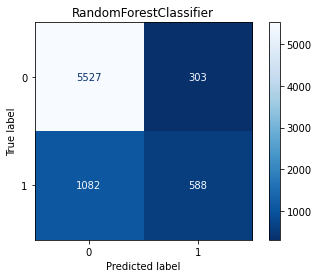



KNeighborsClassifier : 79.73333333333333
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      5830
           1       0.57      0.35      0.44      1670

    accuracy                           0.80      7500
   macro avg       0.70      0.64      0.66      7500
weighted avg       0.78      0.80      0.78      7500



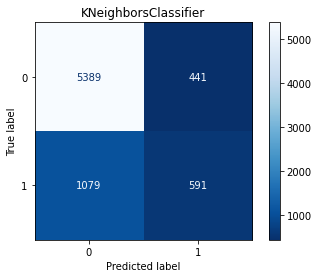



AdaBoostClassifier : 82.06666666666666
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5830
           1       0.71      0.33      0.45      1670

    accuracy                           0.82      7500
   macro avg       0.77      0.65      0.67      7500
weighted avg       0.81      0.82      0.79      7500



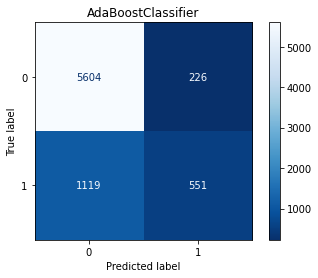



GradientBoostingClassifier : 82.16
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5830
           1       0.69      0.36      0.47      1670

    accuracy                           0.82      7500
   macro avg       0.77      0.66      0.68      7500
weighted avg       0.81      0.82      0.80      7500



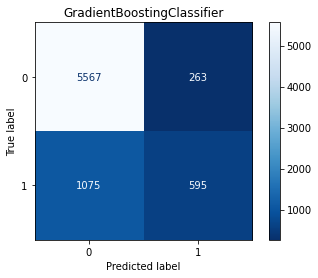



LogisticRegression : 80.82666666666667
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      5830
           1       0.72      0.22      0.34      1670

    accuracy                           0.81      7500
   macro avg       0.77      0.60      0.61      7500
weighted avg       0.79      0.81      0.77      7500



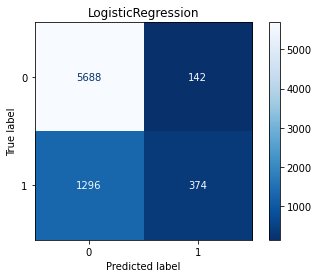

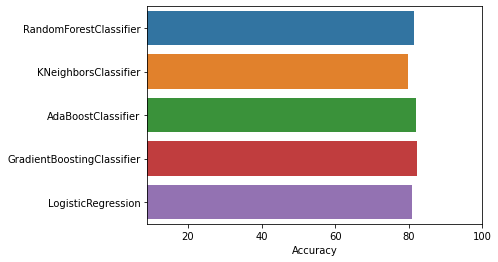

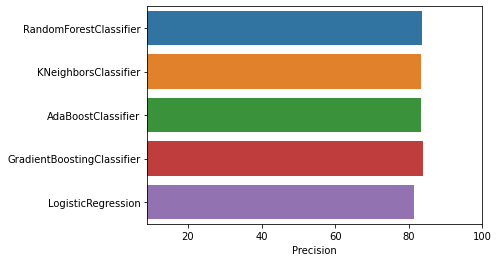

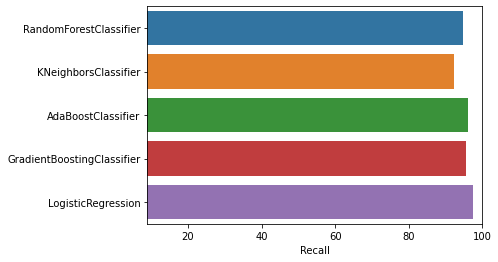

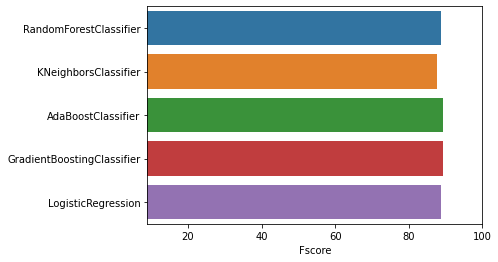

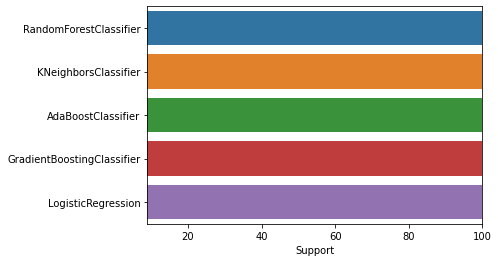

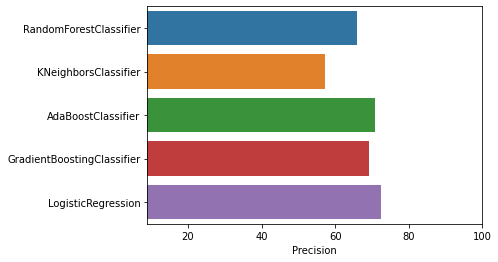

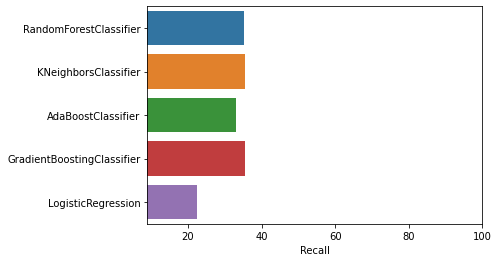

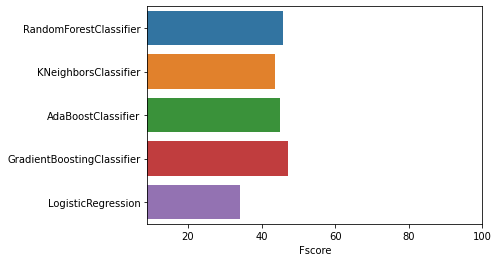

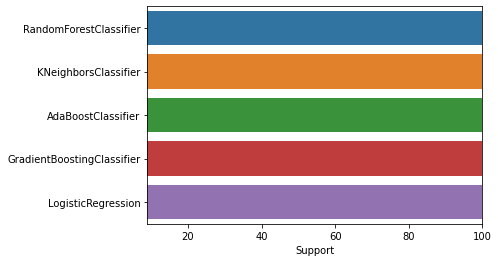

In [ ]:
basic_model=full_activity()
all_model=basic_model.ml_models()
dic_acc_basic,dic_metrics_basic0,dic_metrics_basic1=basic_model.print_models(X_train,X_test,y_train,y_test,all_model,dic_accs,dic0_basic,dic1_basic)
inde=["RandomForestClassifier","KNeighborsClassifier","AdaBoostClassifier","GradientBoostingClassifier","LogisticRegression"]
df_acc_basic,df_metric0_basic,df_metric1_basic=basic_model.make_table(inde,dic_acc_basic,dic_metrics_basic0,dic_metrics_basic1)
basic_model.plot_bar([df_acc_basic[["Accuracy"]],df_metric0_basic,df_metric1_basic])


In [ ]:
df_acc_basic

,Accuracy,ROC-AUC,GMean
RandomForestClassifier,81.533333,0.650062,0.577751
KNeighborsClassifier,79.733333,0.639124,0.571946
AdaBoostClassifier,82.066667,0.645588,0.563161
GradientBoostingClassifier,82.160000,0.655588,0.583279
LogisticRegression,80.826667,0.599798,0.467437


In [ ]:
df_metric0_basic

,Precision,Recall,Fscore,Support
RandomForestClassifier,83.628386,94.802744,88.865664,5830
KNeighborsClassifier,83.317873,92.435678,87.640267,5830
AdaBoostClassifier,83.355645,96.123499,89.285430,5830
GradientBoostingClassifier,83.815116,95.488851,89.271969,5830
LogisticRegression,81.443299,97.564322,88.777899,5830


In [ ]:
df_metric1_basic

,Precision,Recall,Fscore,Support
RandomForestClassifier,65.993266,35.209581,45.919563,1670
KNeighborsClassifier,57.267442,35.389222,43.745374,1670
AdaBoostClassifier,70.913771,32.994012,45.034736,1670
GradientBoostingClassifier,69.347319,35.628743,47.072785,1670
LogisticRegression,72.480620,22.395210,34.217749,1670


In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

In [ ]:
rf=all_model[0]
ada=all_model[2]
gb=all_model[3]

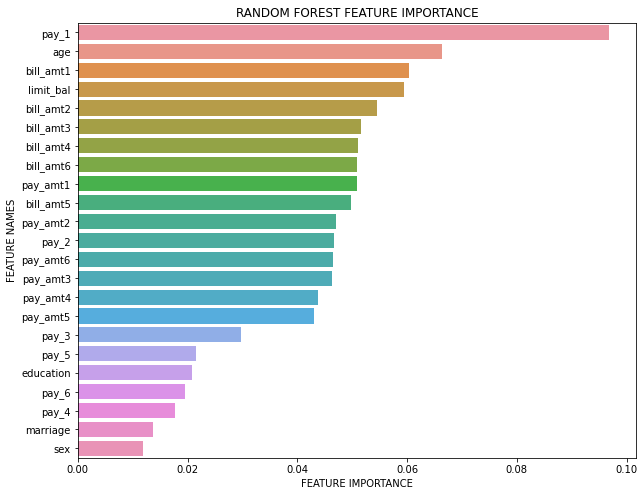

In [ ]:
plot_feature_importance(rf.feature_importances_,X_train.columns,'RANDOM FOREST')

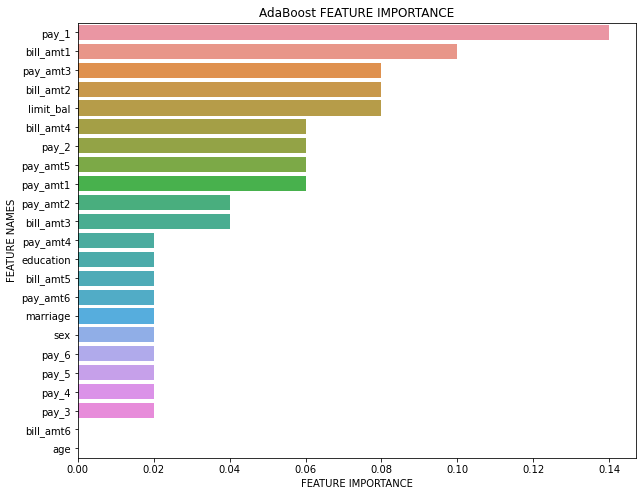

In [ ]:
plot_feature_importance(ada.feature_importances_,X_train.columns,'AdaBoost')

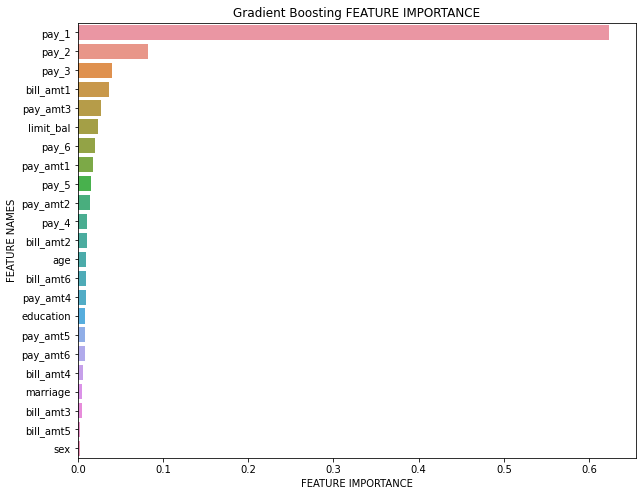

In [ ]:
plot_feature_importance(gb.feature_importances_,X_train.columns,'Gradient Boosting')

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import ClusterCentroids

In [ ]:
def oversample_model(model):
  print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
  print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

  print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
  print("Before OverSampling, counts of label '0': {}\n".format(sum(y_train == 0)))

  X_train_res, y_train_res = model.fit_resample(X_train, y_train)
    
  print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
  print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
    
  print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
  print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

  return X_train_res,y_train_res

In [ ]:
def undersample_model(model):
  print('Before UnderSampling, the shape of train_X: {}'.format(X_train.shape))
  print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

  print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
  print("Before UnderSampling, counts of label '0': {}\n".format(sum(y_train == 0)))

  X_train_res, y_train_res = model.fit_resample(X_train, y_train)
    
  print('After UnderSampling, the shape of train_X: {}'.format(X_train_res.shape))
  print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
    
  print("After UnderSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
  print("After UnderSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

  return X_train_res,y_train_res

In [ ]:
rus=RandomUnderSampler(random_state = 0)
X_train_rus,y_train_rus=undersample_model(rus)

Before UnderSampling, the shape of train_X: (22500, 23)
Before UnderSampling, the shape of train_y: (22500,) 

Before UnderSampling, counts of label '1': 4966
Before UnderSampling, counts of label '0': 17534

After UnderSampling, the shape of train_X: (9932, 23)
After UnderSampling, the shape of train_y: (9932,) 

After UnderSampling, counts of label '1': 4966
After UnderSampling, counts of label '0': 4966


In [ ]:
dic_accs,dic0_basic,dic1_basic=dictionaries()

RandomForestClassifier : 74.30666666666667
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      5830
           1       0.45      0.63      0.52      1670

    accuracy                           0.74      7500
   macro avg       0.66      0.70      0.67      7500
weighted avg       0.78      0.74      0.76      7500



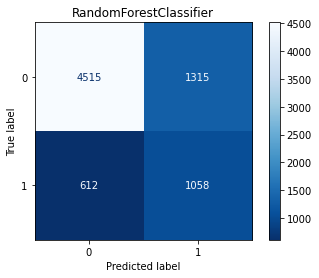



KNeighborsClassifier : 67.88
              precision    recall  f1-score   support

           0       0.87      0.69      0.77      5830
           1       0.37      0.64      0.47      1670

    accuracy                           0.68      7500
   macro avg       0.62      0.67      0.62      7500
weighted avg       0.76      0.68      0.70      7500



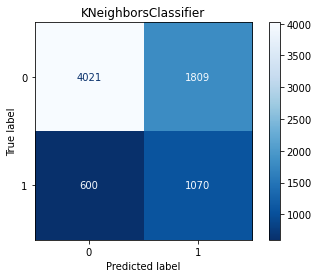



AdaBoostClassifier : 74.88
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      5830
           1       0.45      0.63      0.53      1670

    accuracy                           0.75      7500
   macro avg       0.67      0.71      0.68      7500
weighted avg       0.79      0.75      0.76      7500



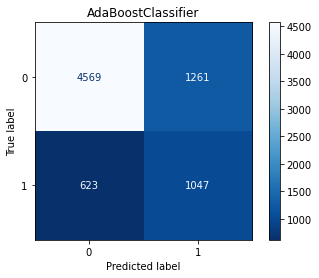



GradientBoostingClassifier : 75.86666666666667
              precision    recall  f1-score   support

           0       0.88      0.79      0.84      5830
           1       0.47      0.64      0.54      1670

    accuracy                           0.76      7500
   macro avg       0.68      0.72      0.69      7500
weighted avg       0.79      0.76      0.77      7500



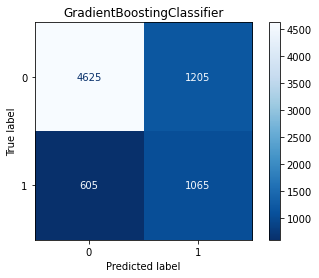



LogisticRegression : 68.38666666666666
              precision    recall  f1-score   support

           0       0.87      0.70      0.77      5830
           1       0.38      0.63      0.47      1670

    accuracy                           0.68      7500
   macro avg       0.62      0.67      0.62      7500
weighted avg       0.76      0.68      0.71      7500



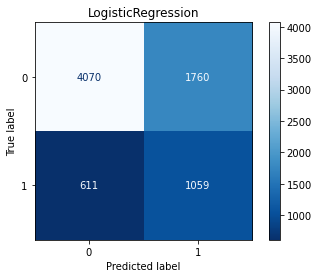

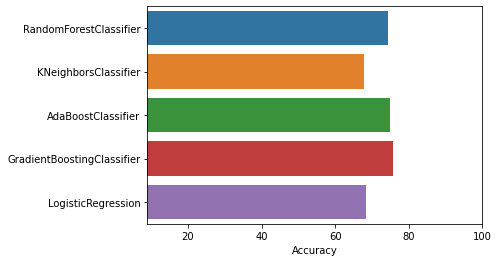

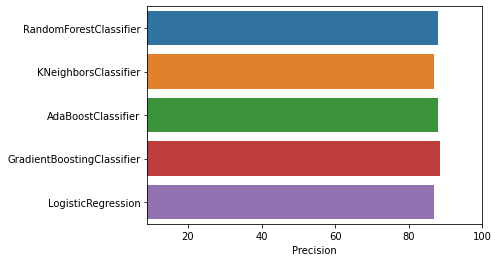

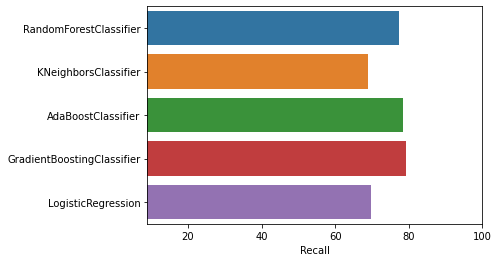

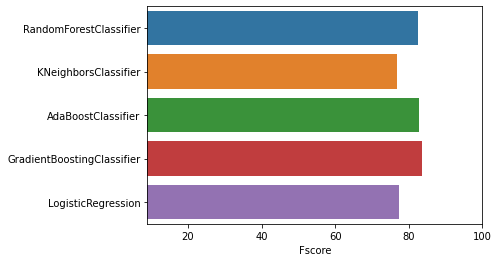

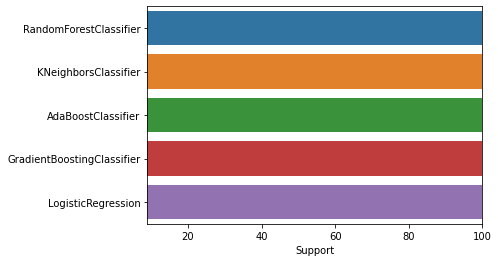

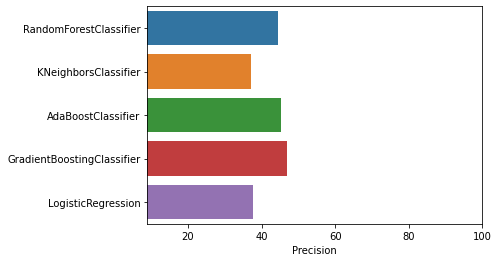

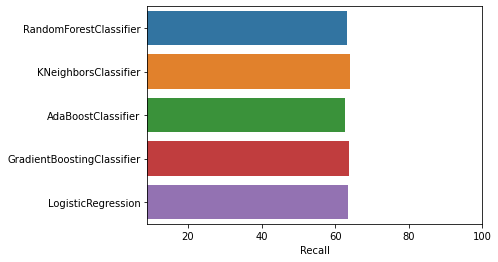

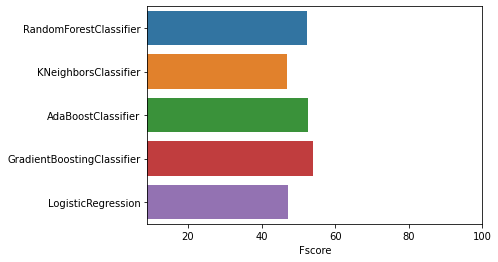

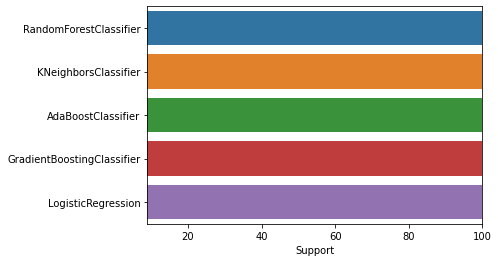

In [ ]:
rus_model=full_activity()
all_model_rus=rus_model.ml_models()
dic_acc_rus,dic_rus_metric0,dic_rus_metric1=rus_model.print_models(X_train_rus,X_test,y_train_rus,y_test,all_model_rus,dic_accs,dic0_basic,dic1_basic)
inde=["RandomForestClassifier","KNeighborsClassifier","AdaBoostClassifier","GradientBoostingClassifier","LogisticRegression"]
df_acc_rus,df_rus_metric0,dic_rus_metric1=basic_model.make_table(inde,dic_acc_rus,dic_rus_metric0,dic_rus_metric1)
rus_model.plot_bar([df_acc_rus[["Accuracy"]],df_rus_metric0,dic_rus_metric1])

In [ ]:
df_acc_rus

,Accuracy,ROC-AUC,GMean
RandomForestClassifier,74.306667,0.703988,0.700453
KNeighborsClassifier,67.880000,0.665213,0.664762
AdaBoostClassifier,74.880000,0.705326,0.700957
GradientBoostingClassifier,75.866667,0.715518,0.711276
LogisticRegression,68.386667,0.666122,0.665354


In [ ]:
df_rus_metric0

,Precision,Recall,Fscore,Support
RandomForestClassifier,88.063195,77.444254,82.413069,5830
KNeighborsClassifier,87.015797,68.970840,76.949574,5830
AdaBoostClassifier,88.000770,78.370497,82.906913,5830
GradientBoostingClassifier,88.432122,79.331046,83.634720,5830
LogisticRegression,86.947233,69.811321,77.442679,5830


In [ ]:
dic_rus_metric1

,Precision,Recall,Fscore,Support
RandomForestClassifier,44.584914,63.353293,52.337373,1670
KNeighborsClassifier,37.165683,64.071856,47.043306,1670
AdaBoostClassifier,45.363951,62.694611,52.639517,1670
GradientBoostingClassifier,46.916300,63.772455,54.060914,1670
LogisticRegression,37.566513,63.413174,47.182000,1670


In [ ]:
nm=NearMiss()
X_train_nm,y_train_nm=undersample_model(nm)

Before UnderSampling, the shape of train_X: (22500, 23)
Before UnderSampling, the shape of train_y: (22500,) 

Before UnderSampling, counts of label '1': 4966
Before UnderSampling, counts of label '0': 17534

After UnderSampling, the shape of train_X: (9932, 23)
After UnderSampling, the shape of train_y: (9932,) 

After UnderSampling, counts of label '1': 4966
After UnderSampling, counts of label '0': 4966


In [ ]:
dic_accs,dic0_basic,dic1_basic=dictionaries()

RandomForestClassifier : 45.57333333333333
              precision    recall  f1-score   support

           0       0.86      0.36      0.51      5830
           1       0.26      0.79      0.39      1670

    accuracy                           0.46      7500
   macro avg       0.56      0.57      0.45      7500
weighted avg       0.72      0.46      0.48      7500



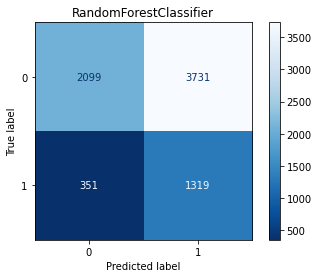



KNeighborsClassifier : 55.82666666666667
              precision    recall  f1-score   support

           0       0.86      0.52      0.65      5830
           1       0.29      0.70      0.41      1670

    accuracy                           0.56      7500
   macro avg       0.57      0.61      0.53      7500
weighted avg       0.73      0.56      0.59      7500



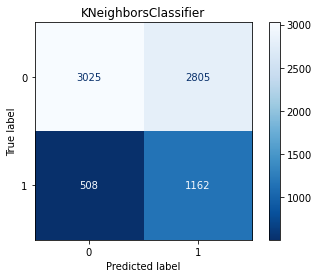



AdaBoostClassifier : 51.14666666666666
              precision    recall  f1-score   support

           0       0.85      0.45      0.59      5830
           1       0.27      0.71      0.39      1670

    accuracy                           0.51      7500
   macro avg       0.56      0.58      0.49      7500
weighted avg       0.72      0.51      0.55      7500



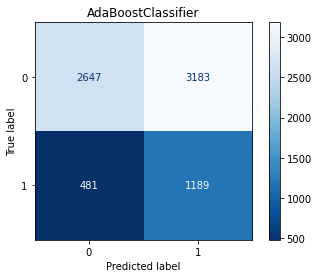



GradientBoostingClassifier : 50.093333333333334
              precision    recall  f1-score   support

           0       0.86      0.43      0.57      5830
           1       0.27      0.75      0.40      1670

    accuracy                           0.50      7500
   macro avg       0.57      0.59      0.49      7500
weighted avg       0.73      0.50      0.53      7500



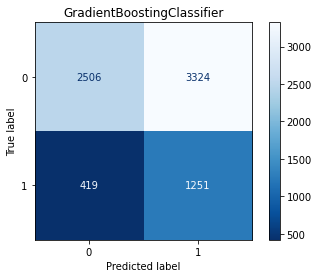



LogisticRegression : 50.12
              precision    recall  f1-score   support

           0       0.82      0.46      0.59      5830
           1       0.26      0.65      0.37      1670

    accuracy                           0.50      7500
   macro avg       0.54      0.55      0.48      7500
weighted avg       0.69      0.50      0.54      7500



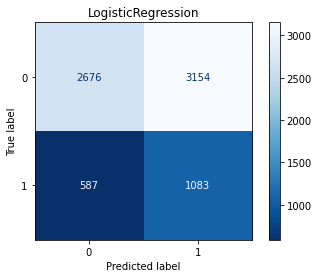

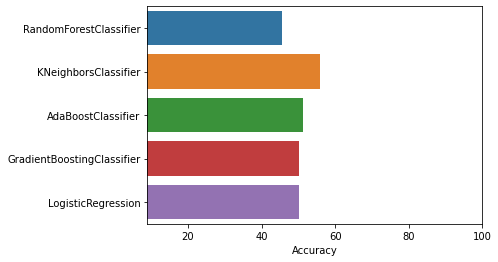

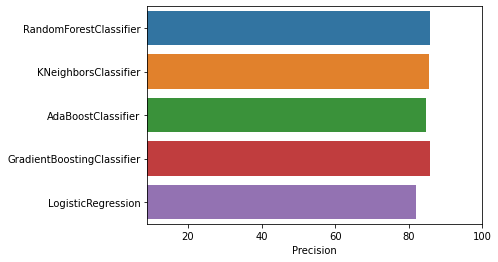

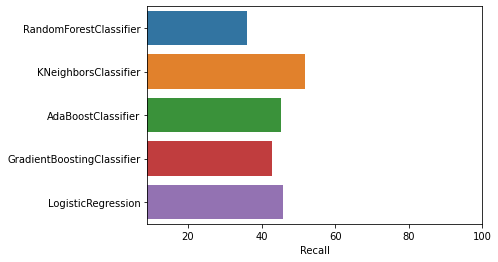

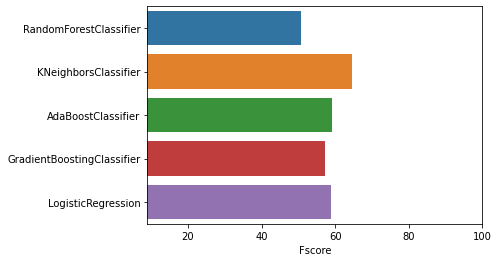

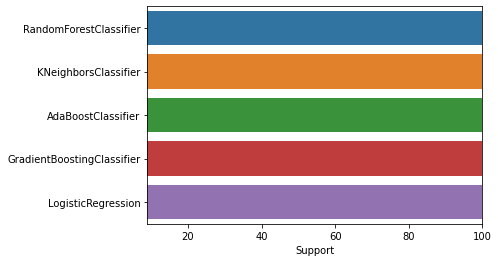

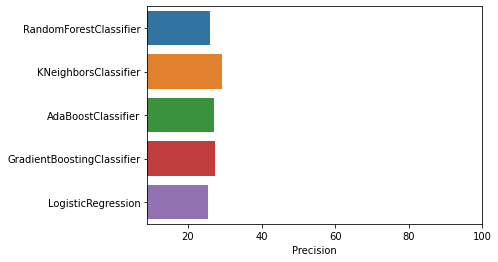

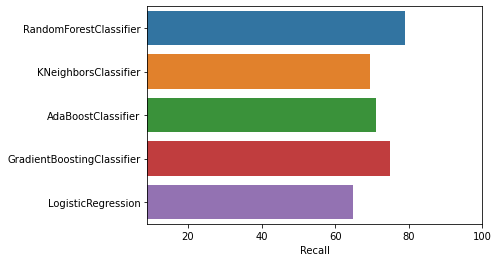

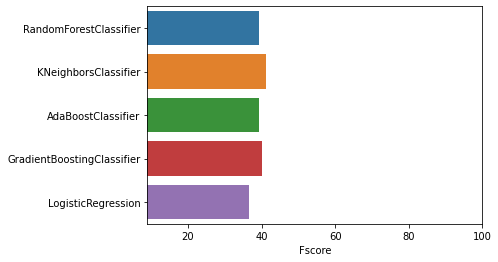

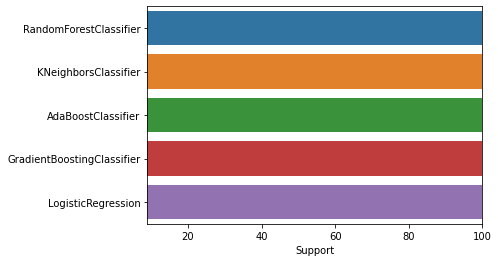

In [ ]:
nm_model=full_activity()
all_model_nm=nm_model.ml_models()
dic_acc_nm,dic_nm_metric0,dic_nm_metric1=nm_model.print_models(X_train_nm,X_test,y_train_nm,y_test,all_model_nm,dic_accs,dic0_basic,dic1_basic)
inde=["RandomForestClassifier","KNeighborsClassifier","AdaBoostClassifier","GradientBoostingClassifier","LogisticRegression"]
df_acc_nm,df_nm_metric0,df_nm_metric1=nm_model.make_table(inde,dic_acc_nm,dic_nm_metric0,dic_nm_metric1)
nm_model.plot_bar([df_acc_nm[["Accuracy"]],df_nm_metric0,df_nm_metric1])

In [ ]:
df_acc_nm

,Accuracy,ROC-AUC,GMean
RandomForestClassifier,45.573333,0.574927,0.533256
KNeighborsClassifier,55.826667,0.607338,0.600860
AdaBoostClassifier,51.146667,0.583003,0.568559
GradientBoostingClassifier,50.093333,0.589474,0.567449
LogisticRegression,50.120000,0.553754,0.545588


In [ ]:
df_nm_metric0

,Precision,Recall,Fscore,Support
RandomForestClassifier,85.673469,36.003431,50.700483,5830
KNeighborsClassifier,85.621285,51.886792,64.616042,5830
AdaBoostClassifier,84.622762,45.403087,59.098013,5830
GradientBoostingClassifier,85.675214,42.984563,57.247287,5830
LogisticRegression,82.010420,45.900515,58.858463,5830


In [ ]:
df_nm_metric1

,Precision,Recall,Fscore,Support
RandomForestClassifier,26.118812,78.982036,39.255952,1670
KNeighborsClassifier,29.291656,69.580838,41.227603,1670
AdaBoostClassifier,27.195791,71.197605,39.357829,1670
GradientBoostingClassifier,27.344262,74.910180,40.064051,1670
LogisticRegression,25.560538,64.850299,36.668360,1670


In [ ]:
cn=ClusterCentroids(random_state=0)
X_train_cn,y_train_cn=undersample_model(cn)

Before UnderSampling, the shape of train_X: (22500, 23)
Before UnderSampling, the shape of train_y: (22500,) 

Before UnderSampling, counts of label '1': 4966
Before UnderSampling, counts of label '0': 17534

After UnderSampling, the shape of train_X: (9932, 23)
After UnderSampling, the shape of train_y: (9932,) 

After UnderSampling, counts of label '1': 4966
After UnderSampling, counts of label '0': 4966


In [ ]:
dic_accs,dic0_basic,dic1_basic=dictionaries()

RandomForestClassifier : 53.98666666666667
              precision    recall  f1-score   support

           0       0.90      0.46      0.61      5830
           1       0.30      0.83      0.44      1670

    accuracy                           0.54      7500
   macro avg       0.60      0.64      0.53      7500
weighted avg       0.77      0.54      0.57      7500



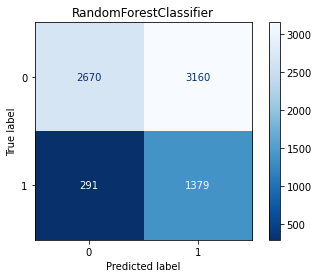



KNeighborsClassifier : 48.68
              precision    recall  f1-score   support

           0       0.88      0.39      0.54      5830
           1       0.28      0.82      0.42      1670

    accuracy                           0.49      7500
   macro avg       0.58      0.60      0.48      7500
weighted avg       0.75      0.49      0.51      7500



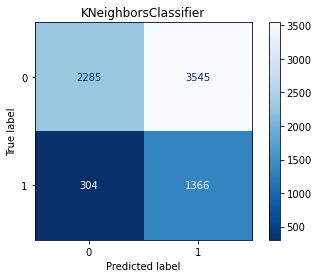



AdaBoostClassifier : 56.08
              precision    recall  f1-score   support

           0       0.89      0.49      0.64      5830
           1       0.31      0.80      0.45      1670

    accuracy                           0.56      7500
   macro avg       0.60      0.65      0.54      7500
weighted avg       0.76      0.56      0.59      7500



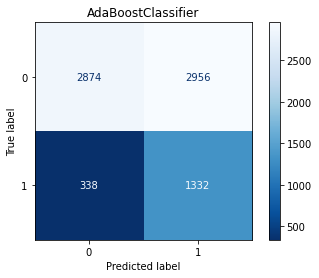



GradientBoostingClassifier : 55.74666666666667
              precision    recall  f1-score   support

           0       0.90      0.48      0.63      5830
           1       0.31      0.81      0.45      1670

    accuracy                           0.56      7500
   macro avg       0.61      0.65      0.54      7500
weighted avg       0.77      0.56      0.59      7500



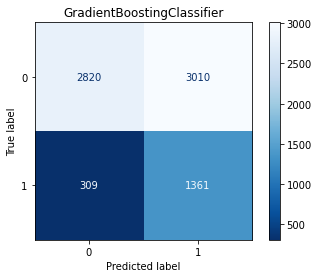



LogisticRegression : 48.626666666666665
              precision    recall  f1-score   support

           0       0.88      0.40      0.54      5830
           1       0.28      0.80      0.41      1670

    accuracy                           0.49      7500
   macro avg       0.58      0.60      0.48      7500
weighted avg       0.74      0.49      0.51      7500



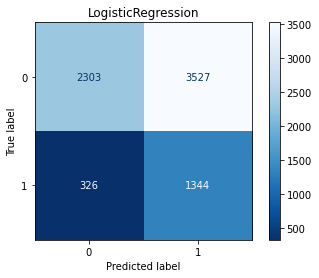

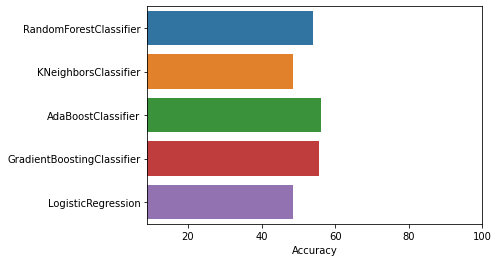

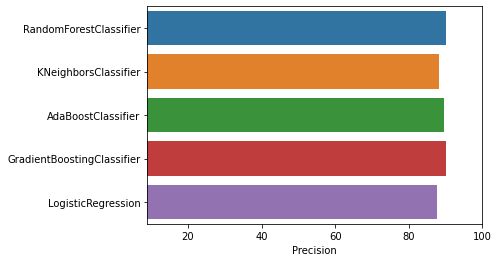

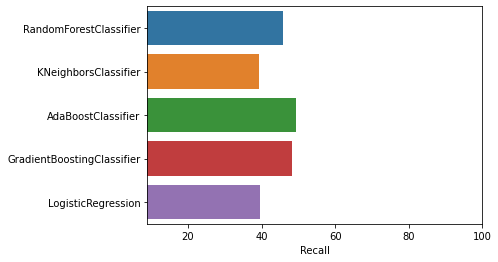

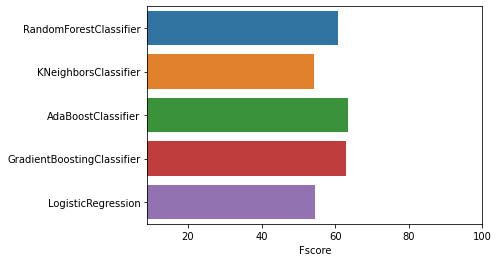

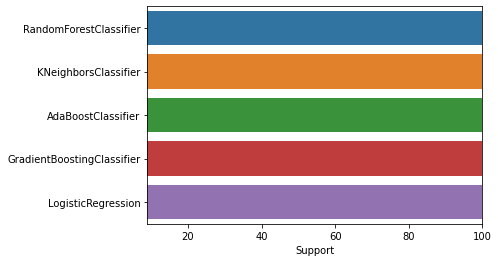

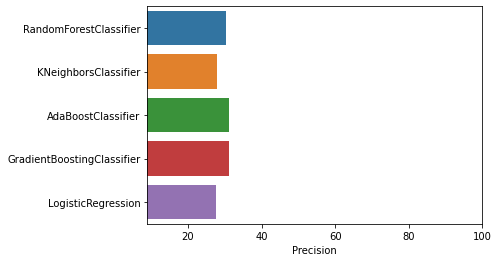

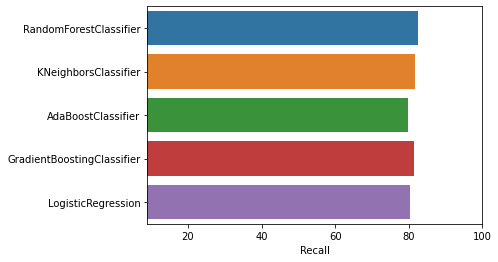

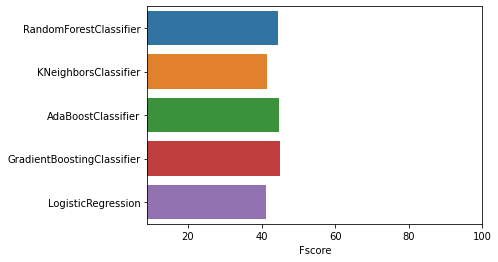

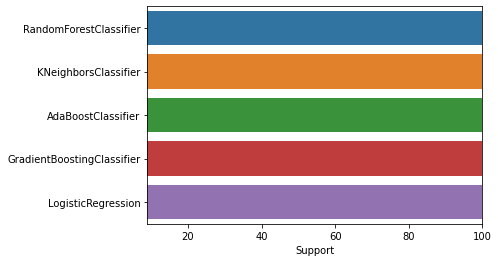

In [ ]:
cn_model=full_activity()
all_model_cn=cn_model.ml_models()
dic_acc_cn,dic_cn_metric0,dic_cn_metric1=cn_model.print_models(X_train_cn,X_test,y_train_cn,y_test,all_model_cn,dic_accs,dic0_basic,dic1_basic)
inde=["RandomForestClassifier","KNeighborsClassifier","AdaBoostClassifier","GradientBoostingClassifier","LogisticRegression"]
df_acc_cn,df_cn_metric0,df_cn_metric1=cn_model.make_table(inde,dic_acc_cn,dic_cn_metric0,dic_cn_metric1)
cn_model.plot_bar([df_acc_cn[["Accuracy"]],df_cn_metric0,df_cn_metric1])

In [ ]:
df_acc_cn

,Accuracy,ROC-AUC,GMean
RandomForestClassifier,53.986667,0.641862,0.614958
KNeighborsClassifier,48.680000,0.604951,0.566208
AdaBoostClassifier,56.080000,0.645286,0.627051
GradientBoostingClassifier,55.746667,0.649338,0.627858
LogisticRegression,48.626667,0.599908,0.563838


In [ ]:
df_cn_metric0

,Precision,Recall,Fscore,Support
RandomForestClassifier,90.172239,45.797599,60.743943,5830
KNeighborsClassifier,88.258015,39.193825,54.281981,5830
AdaBoostClassifier,89.476961,49.296741,63.570007,5830
GradientBoostingClassifier,90.124640,48.370497,62.953455,5830
LogisticRegression,87.599848,39.502573,54.450881,5830


In [ ]:
df_cn_metric1

,Precision,Recall,Fscore,Support
RandomForestClassifier,30.381141,82.574850,44.419391,1670
KNeighborsClassifier,27.815109,81.796407,41.513448,1670
AdaBoostClassifier,31.063433,79.760479,44.712991,1670
GradientBoostingClassifier,31.137040,81.497006,45.058765,1670
LogisticRegression,27.591870,80.479042,41.094634,1670


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import KMeansSMOTE

In [ ]:
ros=RandomOverSampler(random_state=0)
X_train_ros,y_train_ros=oversample_model(ros)

Before OverSampling, the shape of train_X: (22500, 23)
Before OverSampling, the shape of train_y: (22500,) 

Before OverSampling, counts of label '1': 4966
Before OverSampling, counts of label '0': 17534

After OverSampling, the shape of train_X: (35068, 23)
After OverSampling, the shape of train_y: (35068,) 

After OverSampling, counts of label '1': 17534
After OverSampling, counts of label '0': 17534


In [ ]:
dic_accs,dic0_basic,dic1_basic=dictionaries()

RandomForestClassifier : 81.0
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      5830
           1       0.60      0.43      0.50      1670

    accuracy                           0.81      7500
   macro avg       0.73      0.67      0.69      7500
weighted avg       0.79      0.81      0.80      7500



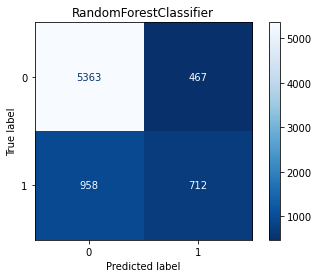



KNeighborsClassifier : 66.28
              precision    recall  f1-score   support

           0       0.86      0.67      0.76      5830
           1       0.36      0.63      0.46      1670

    accuracy                           0.66      7500
   macro avg       0.61      0.65      0.61      7500
weighted avg       0.75      0.66      0.69      7500



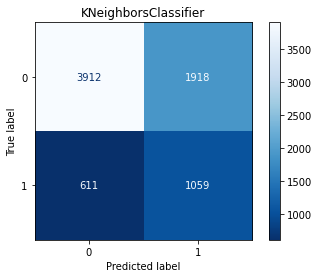



AdaBoostClassifier : 75.65333333333332
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      5830
           1       0.46      0.61      0.53      1670

    accuracy                           0.76      7500
   macro avg       0.67      0.70      0.68      7500
weighted avg       0.78      0.76      0.77      7500



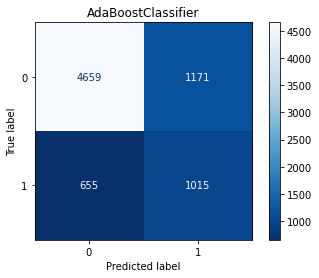



GradientBoostingClassifier : 76.61333333333333
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      5830
           1       0.48      0.62      0.54      1670

    accuracy                           0.77      7500
   macro avg       0.68      0.72      0.69      7500
weighted avg       0.79      0.77      0.78      7500



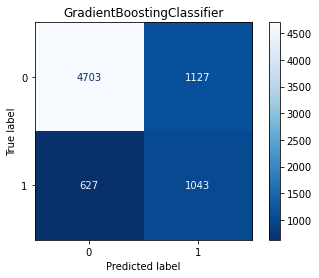



LogisticRegression : 68.42666666666666
              precision    recall  f1-score   support

           0       0.87      0.70      0.77      5830
           1       0.38      0.63      0.47      1670

    accuracy                           0.68      7500
   macro avg       0.62      0.67      0.62      7500
weighted avg       0.76      0.68      0.71      7500



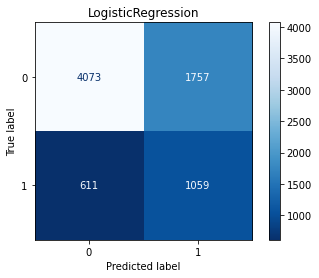

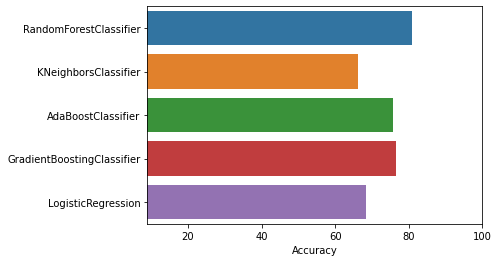

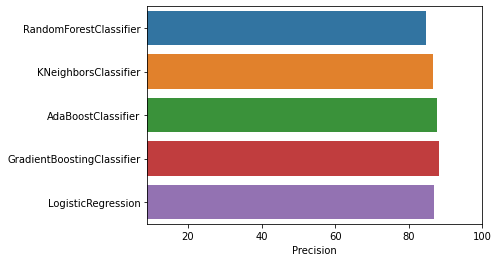

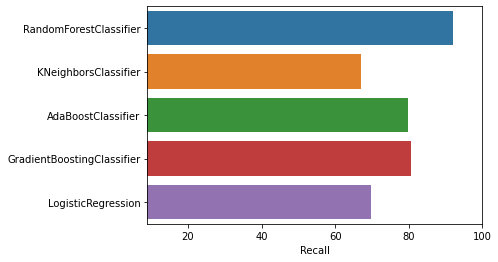

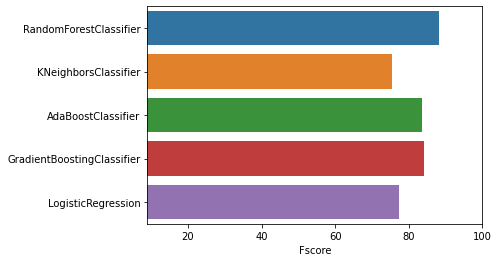

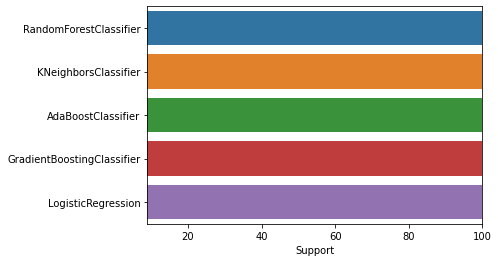

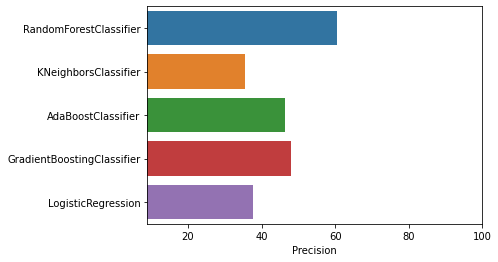

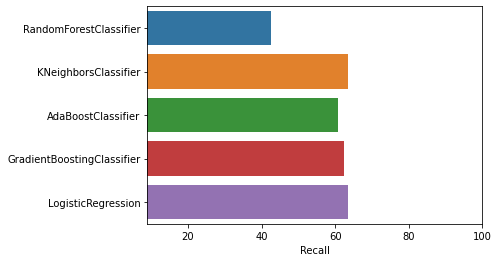

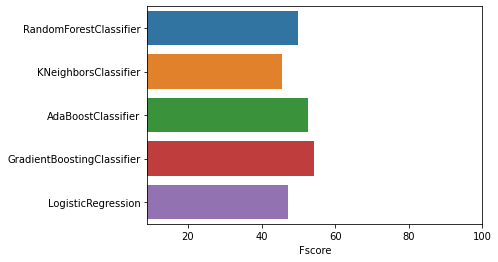

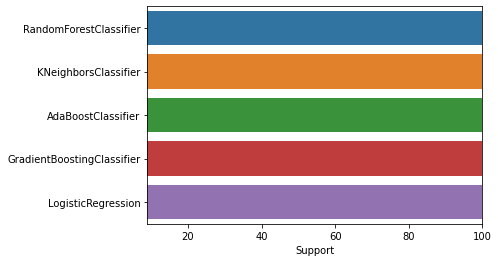

In [ ]:
ros_model=full_activity()
all_model_ros=ros_model.ml_models()
dic_acc_ros,dic_ros_metric0,dic_ros_metric1=ros_model.print_models(X_train_ros,X_test,y_train_ros,y_test,all_model_ros,dic_accs,dic0_basic,dic1_basic)
inde=["RandomForestClassifier","KNeighborsClassifier","AdaBoostClassifier","GradientBoostingClassifier","LogisticRegression"]
df_acc_ros,df_ros_metric0,df_ros_metric1=ros_model.make_table(inde,dic_acc_ros,dic_ros_metric0,dic_ros_metric1)
ros_model.plot_bar([df_acc_ros[["Accuracy"]],df_ros_metric0,df_ros_metric1])

In [ ]:
df_acc_ros

,Accuracy,ROC-AUC,GMean
RandomForestClassifier,81.000000,0.673122,0.626255
KNeighborsClassifier,66.280000,0.652572,0.652311
AdaBoostClassifier,75.653333,0.703463,0.696926
GradientBoostingClassifier,76.613333,0.715620,0.709802
LogisticRegression,68.426667,0.666380,0.665599


In [ ]:
df_ros_metric0

,Precision,Recall,Fscore,Support
RandomForestClassifier,84.844170,91.989708,88.272570,5830
KNeighborsClassifier,86.491267,67.101201,75.572298,5830
AdaBoostClassifier,87.674068,79.914237,83.614501,5830
GradientBoostingClassifier,88.236398,80.668954,84.283154,5830
LogisticRegression,86.955594,69.862779,77.477649,5830


In [ ]:
df_ros_metric1

,Precision,Recall,Fscore,Support
RandomForestClassifier,60.390161,42.634731,49.982450,1670
KNeighborsClassifier,35.572724,63.413174,45.577792,1670
AdaBoostClassifier,46.431839,60.778443,52.645228,1670
GradientBoostingClassifier,48.064516,62.455090,54.322917,1670
LogisticRegression,37.606534,63.413174,47.213553,1670


In [ ]:
smo=SMOTE(random_state=0)
X_train_smo,y_train_smo=oversample_model(smo)

Before OverSampling, the shape of train_X: (22500, 23)
Before OverSampling, the shape of train_y: (22500,) 

Before OverSampling, counts of label '1': 4966
Before OverSampling, counts of label '0': 17534

After OverSampling, the shape of train_X: (35068, 23)
After OverSampling, the shape of train_y: (35068,) 

After OverSampling, counts of label '1': 17534
After OverSampling, counts of label '0': 17534


In [ ]:
dic_accs,dic0_basic,dic1_basic=dictionaries()

RandomForestClassifier : 78.70666666666666
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      5830
           1       0.52      0.48      0.50      1670

    accuracy                           0.79      7500
   macro avg       0.69      0.68      0.68      7500
weighted avg       0.78      0.79      0.78      7500



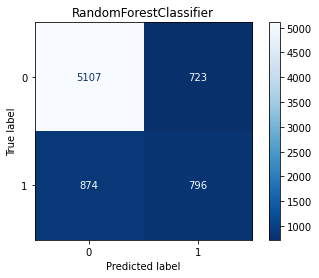



KNeighborsClassifier : 66.97333333333333
              precision    recall  f1-score   support

           0       0.86      0.68      0.76      5830
           1       0.36      0.63      0.46      1670

    accuracy                           0.67      7500
   macro avg       0.61      0.65      0.61      7500
weighted avg       0.75      0.67      0.69      7500



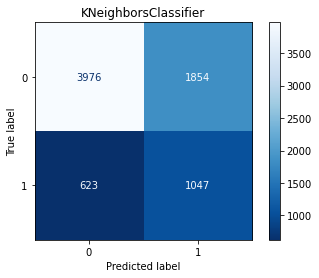



AdaBoostClassifier : 75.96000000000001
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      5830
           1       0.47      0.57      0.52      1670

    accuracy                           0.76      7500
   macro avg       0.67      0.69      0.68      7500
weighted avg       0.78      0.76      0.77      7500



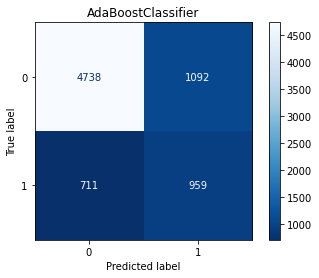



GradientBoostingClassifier : 78.32000000000001
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      5830
           1       0.51      0.54      0.53      1670

    accuracy                           0.78      7500
   macro avg       0.69      0.70      0.69      7500
weighted avg       0.79      0.78      0.79      7500



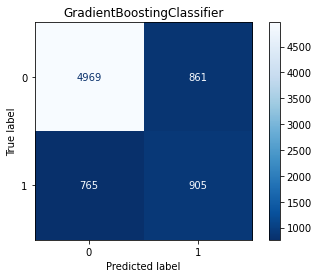



LogisticRegression : 67.36
              precision    recall  f1-score   support

           0       0.87      0.69      0.77      5830
           1       0.36      0.63      0.46      1670

    accuracy                           0.67      7500
   macro avg       0.61      0.66      0.61      7500
weighted avg       0.75      0.67      0.70      7500



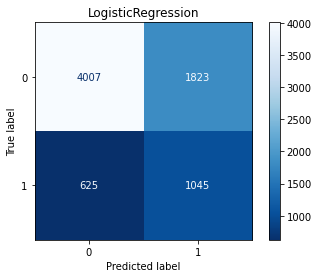

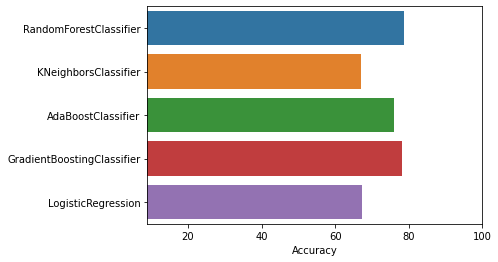

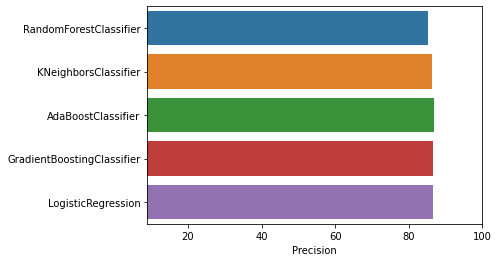

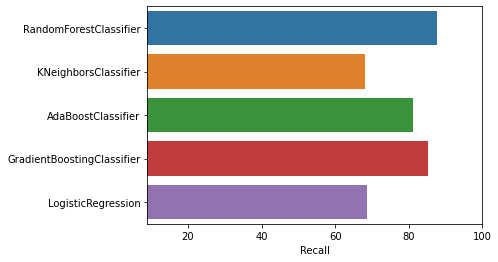

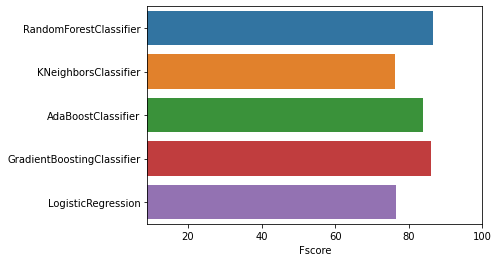

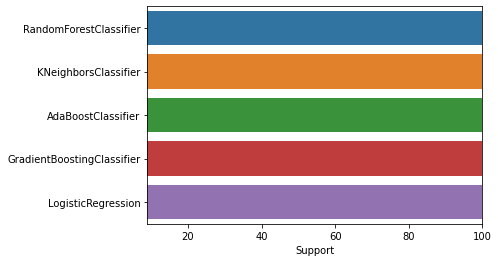

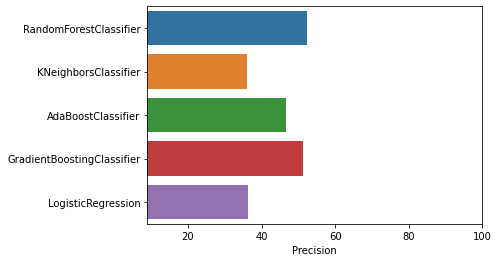

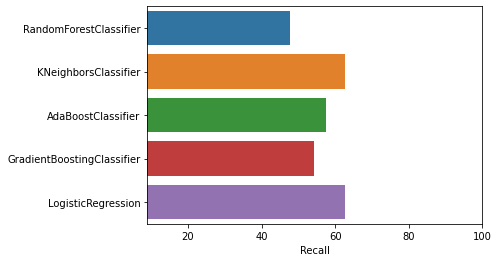

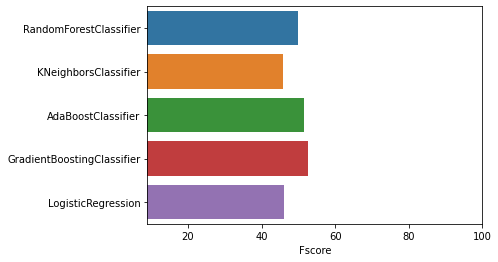

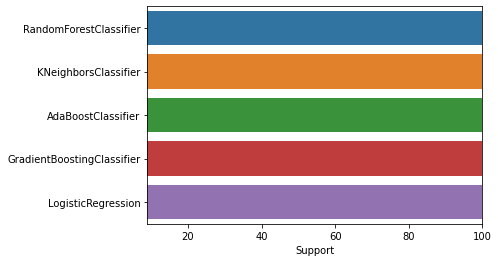

In [ ]:
smo_model=full_activity()
all_model_smo=smo_model.ml_models()
dic_acc_smo,dic_smo_metric0,dic_smo_metric1=smo_model.print_models(X_train_smo,X_test,y_train_smo,y_test,all_model_smo,dic_accs,dic0_basic,dic1_basic)
inde=["RandomForestClassifier","KNeighborsClassifier","AdaBoostClassifier","GradientBoostingClassifier","LogisticRegression"]
df_acc_smo,df_smo_metric0,df_smo_metric1=smo_model.make_table(inde,dic_acc_smo,dic_smo_metric0,dic_smo_metric1)
smo_model.plot_bar([df_acc_smo[["Accuracy"]],df_smo_metric0,df_smo_metric1])

In [ ]:
df_acc_smo

,Accuracy,ROC-AUC,GMean
RandomForestClassifier,78.706667,0.676316,0.646170
KNeighborsClassifier,66.973333,0.654468,0.653889
AdaBoostClassifier,75.960000,0.693472,0.683147
GradientBoostingClassifier,78.320000,0.697116,0.679620
LogisticRegression,67.360000,0.656528,0.655806


In [ ]:
df_smo_metric0

,Precision,Recall,Fscore,Support
RandomForestClassifier,85.387059,87.598628,86.478706,5830
KNeighborsClassifier,86.453577,68.198971,76.248921,5830
AdaBoostClassifier,86.951734,81.269297,84.014540,5830
GradientBoostingClassifier,86.658528,85.231561,85.939121,5830
LogisticRegression,86.506908,68.730703,76.601032,5830


In [ ]:
df_smo_metric1

,Precision,Recall,Fscore,Support
RandomForestClassifier,52.402897,47.664671,49.921606,1670
KNeighborsClassifier,36.091003,62.694611,45.810545,1670
AdaBoostClassifier,46.757679,57.425150,51.545284,1670
GradientBoostingClassifier,51.245753,54.191617,52.677532,1670
LogisticRegression,36.436541,62.574850,46.055531,1670


In [ ]:
ksmo=KMeansSMOTE(random_state=0)
X_train_ksmo,y_train_ksmo=oversample_model(ksmo)

Before OverSampling, the shape of train_X: (22500, 23)
Before OverSampling, the shape of train_y: (22500,) 

Before OverSampling, counts of label '1': 4966
Before OverSampling, counts of label '0': 17534

After OverSampling, the shape of train_X: (35069, 23)
After OverSampling, the shape of train_y: (35069,) 

After OverSampling, counts of label '1': 17535
After OverSampling, counts of label '0': 17534


In [ ]:
dic_accs,dic0_basic,dic1_basic=dictionaries()

RandomForestClassifier : 80.90666666666667
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      5830
           1       0.60      0.42      0.49      1670

    accuracy                           0.81      7500
   macro avg       0.72      0.67      0.69      7500
weighted avg       0.79      0.81      0.80      7500



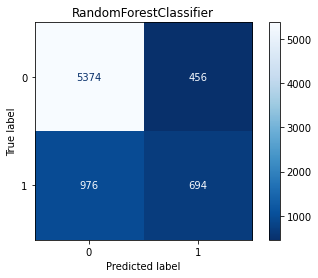



KNeighborsClassifier : 79.66666666666666
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      5830
           1       0.55      0.44      0.49      1670

    accuracy                           0.80      7500
   macro avg       0.70      0.67      0.68      7500
weighted avg       0.78      0.80      0.79      7500



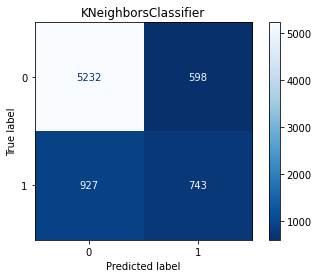



AdaBoostClassifier : 80.69333333333333
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      5830
           1       0.59      0.44      0.50      1670

    accuracy                           0.81      7500
   macro avg       0.72      0.67      0.69      7500
weighted avg       0.79      0.81      0.80      7500



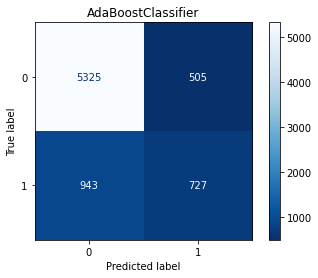



GradientBoostingClassifier : 80.90666666666667
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      5830
           1       0.59      0.47      0.52      1670

    accuracy                           0.81      7500
   macro avg       0.72      0.69      0.70      7500
weighted avg       0.80      0.81      0.80      7500



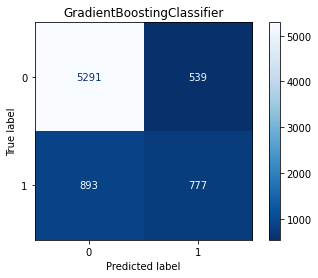



LogisticRegression : 80.64
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      5830
           1       0.59      0.45      0.51      1670

    accuracy                           0.81      7500
   macro avg       0.72      0.68      0.69      7500
weighted avg       0.79      0.81      0.80      7500



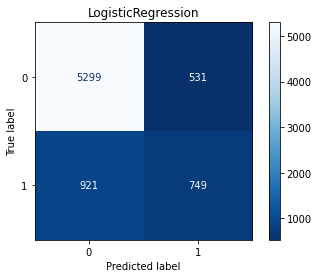

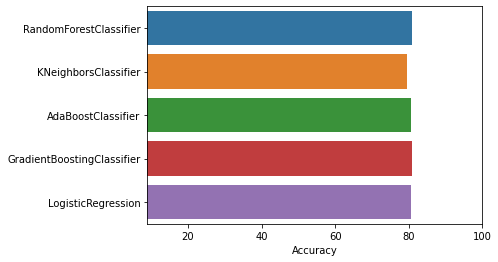

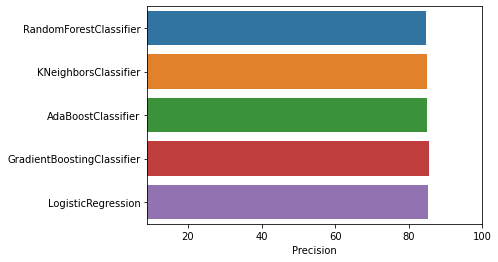

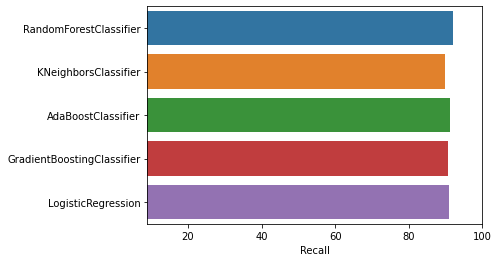

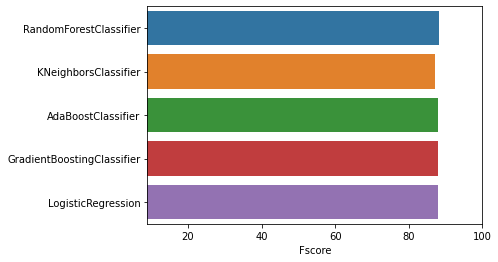

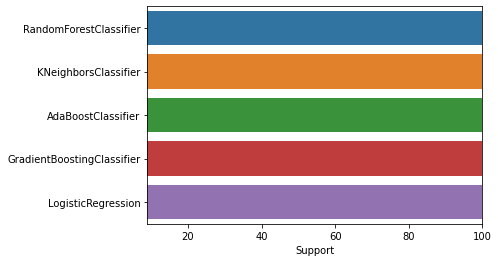

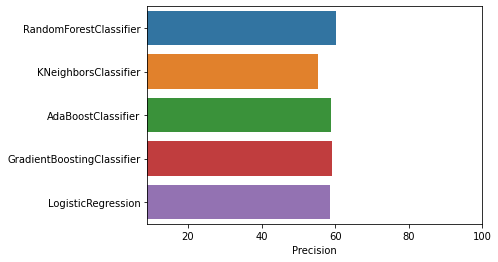

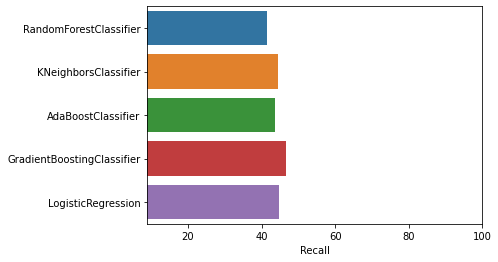

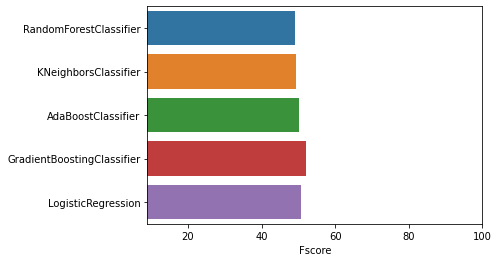

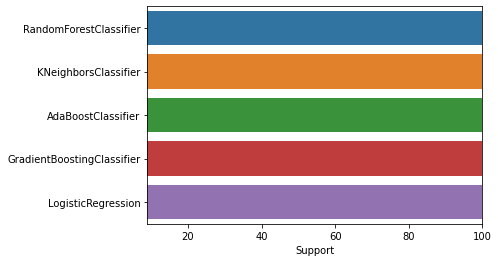

In [ ]:
ksmo_model=full_activity()
all_model_ksmo=ksmo_model.ml_models()
dic_acc_ksmo,dic_ksmo_metric0,dic_ksmo_metric1=ksmo_model.print_models(X_train_ksmo,X_test,y_train_ksmo,y_test,all_model_ksmo,dic_accs,dic0_basic,dic1_basic)
inde=["RandomForestClassifier","KNeighborsClassifier","AdaBoostClassifier","GradientBoostingClassifier","LogisticRegression"]
df_acc_ksmo,df_ksmo_metric0,df_ksmo_metric1=ksmo_model.make_table(inde,dic_acc_ksmo,dic_ksmo_metric0,dic_ksmo_metric1)
ksmo_model.plot_bar([df_acc_ksmo[["Accuracy"]],df_ksmo_metric0,df_ksmo_metric1])

In [ ]:
df_acc_ksmo

,Accuracy,ROC-AUC,GMean
RandomForestClassifier,80.906667,0.668676,0.618922
KNeighborsClassifier,79.666667,0.671169,0.631882
AdaBoostClassifier,80.693333,0.674354,0.630572
GradientBoostingClassifier,80.906667,0.686408,0.649811
LogisticRegression,80.640000,0.678711,0.638477


In [ ]:
df_ksmo_metric0

,Precision,Recall,Fscore,Support
RandomForestClassifier,84.629921,92.178388,88.243021,5830
KNeighborsClassifier,84.948855,89.742710,87.280007,5830
AdaBoostClassifier,84.955329,91.337907,88.031080,5830
GradientBoostingClassifier,85.559508,90.754717,88.080573,5830
LogisticRegression,85.192926,90.891938,87.950207,5830


In [ ]:
df_ksmo_metric1

,Precision,Recall,Fscore,Support
RandomForestClassifier,60.347826,41.556886,49.219858,1670
KNeighborsClassifier,55.406413,44.491018,49.352375,1670
AdaBoostClassifier,59.009740,43.532934,50.103377,1670
GradientBoostingClassifier,59.042553,46.526946,52.042867,1670
LogisticRegression,58.515625,44.850299,50.779661,1670


In [ ]:
'''base_learners = [
                 ('rf_1', RandomForestClassifier(random_state=0)),
                 ('rf_2',GradientBoostingClassifier(n_estimators=200,random_state=0))             
                ]

lr1 = StackingClassifier(estimators=base_learners)
lr1.fit(X_train, y_train)
predictions = lr1.predict(X_test)
print(accuracy_score(y_test,predictions))
# print classification report
print(classification_report(y_test, predictions))
print(precision_score(y_test, predictions))
print(recall_score(y_test, predictions))
print(f1_score(y_test, predictions))
print(roc_auc_score(y_test, predictions))
plot_confusion_matrix(lr1, X_test, y_test, cmap="Blues_r")
plt.show()'''

'base_learners = [\n                 (\'rf_1\', RandomForestClassifier(random_state=0)),\n                 (\'rf_2\',GradientBoostingClassifier(n_estimators=200,random_state=0))             \n                ]\n\nlr1 = StackingClassifier(estimators=base_learners)\nlr1.fit(X_train, y_train)\npredictions = lr1.predict(X_test)\nprint(accuracy_score(y_test,predictions))\n# print classification report\nprint(classification_report(y_test, predictions))\nprint(precision_score(y_test, predictions))\nprint(recall_score(y_test, predictions))\nprint(f1_score(y_test, predictions))\nprint(roc_auc_score(y_test, predictions))\nplot_confusion_matrix(lr1, X_test, y_test, cmap="Blues_r")\nplt.show()'